In [2]:
# Jupyter notebook related
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Built-in modules
import glob
import os

# Imports from eo-learn and sentinelhub-py
from eolearn.core import (
    EOExecutor,
    FeatureType,
    LinearWorkflow,
    LoadTask
)
from eolearn.coregistration import (
    ECCRegistrationTask
)
from eolearn.io import (
    ExportToTiffTask
)

## Export EOPatches to GeoTiff

In [3]:
location = 'gillam_mb_canada'
# location = 'mystery_lake_mb_canada'
# location = 'yellowknife_nt_canada'

home_dir = os.environ['HOME']
data_dir = f'{home_dir}/data/northern-cities'
eopatches_dir = f'{data_dir}/{location}/eopatches_clean'

num_eopatches = len(glob.glob(f'{eopatches_dir}/eopatch-*'))

### Define tasks

In [4]:
load_clean_scenes = LoadTask(f'{eopatches_dir}')

# coregister_scenes = ECCRegistrationTask((FeatureType.DATA, 'FEATURES'),
#                                         channel=3)

export_ten_meters = ExportToTiffTask((FeatureType.DATA, 'FEATURES'),
                                     folder=f'{data_dir}/{location}/S2_10m/',
                                     band_indices=[0, 1, 2, 3])

# export_twenty_meters = ExportToTiffTask((FeatureType.DATA, 'FEATURES'),
#                                         folder=f'{data_dir}/{location}/S2_20m/',
#                                         band_indices=[4, 5])

# export_blue = ExportToTiffTask((FeatureType.DATA, 'FEATURES'),
#                                folder=f'{data_dir}/{location}/images/',
#                                band_indices=[0])

# export_green = ExportToTiffTask((FeatureType.DATA, 'FEATURES'),
#                                 folder=f'{data_dir}/{location}/images/',
#                                 band_indices=[1])

# export_red = ExportToTiffTask((FeatureType.DATA, 'FEATURES'),
#                               folder=f'{data_dir}/{location}/images/',
#                               band_indices=[2])

### Define workflow

In [5]:
workflow = LinearWorkflow(
    load_clean_scenes,
#     coregister_scenes,
    export_ten_meters,
#     export_twenty_meters
)

# workflow = LinearWorkflow(
#     load_clean_scenes,
#     export_red,
#     export_green,
#     export_blue
# )

### Visualize workflow

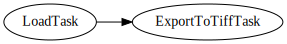

In [7]:
workflow.dependency_graph()

### Prepare execution arguments

In [8]:
execution_args = []

for idx in range(num_eopatches):
    print(f'eopatch-{idx:04d}')
    execution_args.append({
        load_clean_scenes: {'eopatch_folder': f'eopatch-{idx:04d}'},
        export_ten_meters: {'filename': f'{location}_%Y-%m-%d-%H-%M-%S_eopatch-{idx:04d}'},
#         export_twenty_meters: {'filename': f'{location}_%Y-%m-%d-%H-%M-%S_eopatch-{idx:04d}'},
    })

# for idx in range(num_eopatches):
#     print(f'eopatch-{idx:04d}')
#     execution_args.append({
#         load_clean_scenes: {'eopatch_folder': f'eopatch-{idx:04d}'},
#         export_red: {'filename': f'{idx:06d}_%Y%m%dT%H%M%S_B2'},
#         export_green: {'filename': f'{idx:06d}_%Y%m%dT%H%M%S_B3'},
#         export_blue: {'filename': f'{idx:06d}_%Y%m%dT%H%M%S_B4'}
#     })

len(execution_args)

eopatch-0000
eopatch-0001
eopatch-0002
eopatch-0003
eopatch-0004
eopatch-0005
eopatch-0006
eopatch-0007
eopatch-0008
eopatch-0009
eopatch-0010
eopatch-0011
eopatch-0012
eopatch-0013
eopatch-0014
eopatch-0015
eopatch-0016
eopatch-0017
eopatch-0018
eopatch-0019
eopatch-0020
eopatch-0021
eopatch-0022
eopatch-0023
eopatch-0024
eopatch-0025
eopatch-0026
eopatch-0027
eopatch-0028
eopatch-0029
eopatch-0030
eopatch-0031
eopatch-0032
eopatch-0033
eopatch-0034
eopatch-0035
eopatch-0036
eopatch-0037
eopatch-0038
eopatch-0039
eopatch-0040
eopatch-0041
eopatch-0042
eopatch-0043
eopatch-0044
eopatch-0045
eopatch-0046
eopatch-0047
eopatch-0048
eopatch-0049
eopatch-0050
eopatch-0051
eopatch-0052
eopatch-0053
eopatch-0054
eopatch-0055
eopatch-0056
eopatch-0057
eopatch-0058
eopatch-0059
eopatch-0060
eopatch-0061
eopatch-0062
eopatch-0063
eopatch-0064
eopatch-0065
eopatch-0066
eopatch-0067
eopatch-0068
eopatch-0069
eopatch-0070
eopatch-0071
eopatch-0072
eopatch-0073
eopatch-0074
eopatch-0075
eopatch-0076

455

### Execute workflow

In [9]:
executor = EOExecutor(workflow, execution_args, save_logs=True)
executor.run(workers=1, multiprocess=True)

executor.make_report()

failed_ids = executor.get_failed_executions()
if failed_ids:
    raise RuntimeError(f'Execution failed EOPatches with IDs:\n{failed_ids}\n'
                       f'For more info check report at {executor.get_report_filename()}')

  0%|          | 0/455 [00:00<?, ?it/s]